In [81]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [82]:
F = len('Agnieszka')
L = len('Welian')
N = (L+F) * 100

stan_data = {
    "N":N,
}

## Excercise 1 - generate data

In [83]:
model1 = CmdStanModel(stan_file='code_1.stan')
sample1 = model1.sample(stan_data, iter_sampling=1000, iter_warmup=1,  chains =1)

model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(stan_data, iter_sampling=1000, iter_warmup=1, chains =1)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:11 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


[-1.33161   -0.258677   1.67314   ... -0.487267   0.0195787  0.0783178]
[ 1.86184  1.18723 -2.35976 ... -1.46321  3.38614  1.75267]


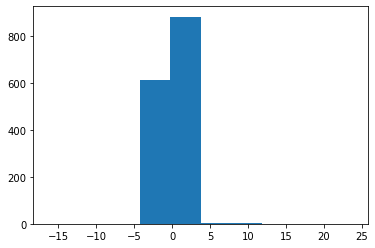

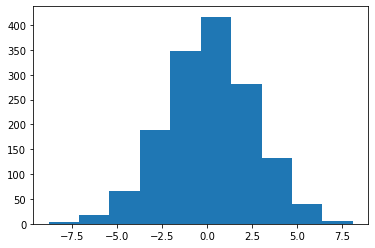

In [84]:
y1 = sample1.stan_variable('y')[0]
print(y1)
y2 = sample2.stan_variable('y')[0]
print(y2)

data1 = {
    'N': N,
    'y': y1
}

data2 = {
    'N': N,
    'y': y2
}

plt.hist(y1)
plt.show()
plt.hist(y2)
plt.show()


## Excercise 2 - compare normal and student models for data from first file

In [85]:
model3 = CmdStanModel(stan_file='code_3.stan')
fit3=model3.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit3_2=model3.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

model4 = CmdStanModel(stan_file='code_4.stan')
fit4=model4.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit4_2=model4.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


        rank        waic        p_waic    d_waic    weight          se  \
model3     0 -2733.34578  4.919345e-24   0.00000  0.999512  175.729435   
model4     1 -2832.09822  1.082495e-24  98.75244  0.000488   23.929783   

               dse  warning waic_scale  
model3    0.000000    False        log  
model4  165.860442    False        log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


        rank         waic        p_waic      d_waic    weight          se  \
model4     0 -4399.282892  2.977999e-24    0.000000  0.463804   54.197669   
model3     1 -4878.752260  5.414055e-24  479.469368  0.536196  119.741969   

              dse  warning waic_scale  
model4   0.000000    False        log  
model3  87.314384    False        log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


Text(0.5, 1.0, 'For data from model 2')

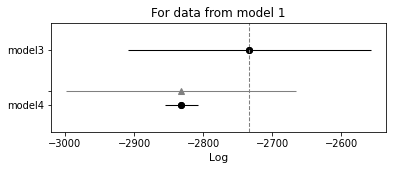

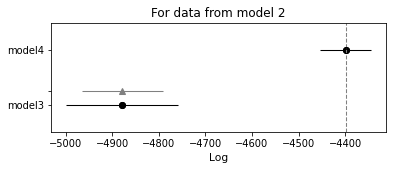

In [86]:
compare_dict_1 = {'model3': fit3,'model4': fit4}
compare_dict_2 = {'model3': fit3_2,'model4': fit4_2}

model_compare_waic_1 = az.compare(compare_dict_1, ic = 'waic')

print(model_compare_waic_1.head())
az.plot_compare(model_compare_waic_1)
plt.title('For data from model 1')

model_compare_waic_2 = az.compare(compare_dict_2, ic = 'waic')

print(model_compare_waic_2.head())
az.plot_compare(model_compare_waic_2)
plt.title('For data from model 2')


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank         loo  p_loo     d_loo    weight          se         dse  \
model3     0 -2733.34578    0.0   0.00000  0.999512  175.729435    0.000000   
model4     1 -2832.09822    0.0  98.75244  0.000488   23.929783  165.860442   

        warning loo_scale  
model3     True       log  
model4     True       log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank          loo  p_loo       d_loo    weight          se        dse  \
model4     0 -4399.282892    0.0    0.000000  0.463804   54.197669   0.000000   
model3     1 -4878.752260    0.0  479.469368  0.536196  119.741969  87.314384   

        warning loo_scale  
model4     True       log  
model3     True       log  


Text(0.5, 1.0, 'For data from model 2')

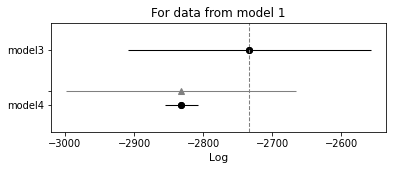

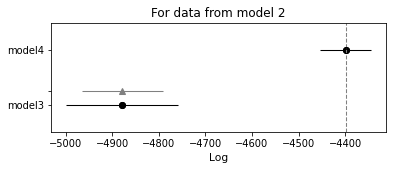

In [87]:
model_compare_loo_1 = az.compare(compare_dict_1, ic="loo", method="stacking", scale="log")

print(model_compare_loo_1.head())
az.plot_compare(model_compare_loo_1)
plt.title('For data from model 1')

model_compare_loo_2 = az.compare(compare_dict_2, ic = 'loo')

print(model_compare_loo_2.head())
az.plot_compare(model_compare_loo_2)
plt.title('For data from model 2')

## Excercise 3 - compare models with different numbers of predictors

In [88]:
x2 = sample2.stan_variable('X')

x2_1 = x2.reshape(1000,-1)[0:1,:N]
x2_1 = np.transpose(x2_1)

x2_2 = x2.reshape(1000,-1)[0:2,:N]
x2_2 = np.transpose(x2_2)

x2_3 = x2.reshape(1000,-1)[0:3,:N]
x2_3 = np.transpose(x2_3)


In [89]:
model5 = CmdStanModel(stan_file='code_5.stan')

fit5_1 = model5.sample(data={'N':N, 'K': 1, 'y':y2,'X':x2_1} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)


fit5_2 = model5.sample(data={'N':N, 'K': 2, 'y':y2,'X':x2_2} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)
                            

fit5_3 = model5.sample(data={'N':N, 'K': 3, 'y':y2,'X':x2_3} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank         loo  p_loo     d_loo    weight          se         dse  \
model3     0 -2733.34578    0.0   0.00000  0.999512  175.729435    0.000000   
model4     1 -2832.09822    0.0  98.75244  0.000488   23.929783  165.860442   

        warning loo_scale  
model3     True       log  
model4     True       log  
        rank        waic        p_waic    d_waic    weight          se  \
model3     0 -2733.34578  4.919345e-24   0.00000  0.999512  175.729435   
model4     1 -2832.09822  1.082495e-24  98.75244  0.000488   23.929783   

               dse  warning waic_scale  
model3    0.000000    False        log  
model4  165.860442    False        log  


Text(0.5, 1.0, 'For data from model 5 - waic')

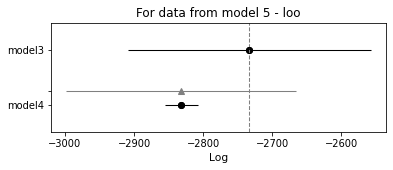

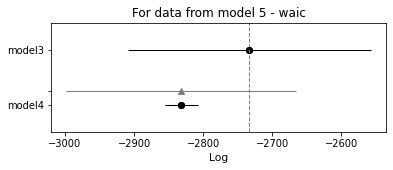

In [90]:
compare_dict_model5 = {'fit5_1': fit5_1, 'fit5_2': fit5_1, 'fit5_3': fit5_3}

model_compare_loo = az.compare(compare_dict_1, ic="loo")
model_compare_waic = az.compare(compare_dict_1, ic="waic")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('For data from model 5 - loo')

print(model_compare_waic.head())
az.plot_compare(model_compare_waic)
plt.title('For data from model 5 - waic')